In [241]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

import seaborn as sns
sns.set_theme(style="whitegrid")




load_dotenv(override=True)
SQLALCHEMY_DATABASE_URI = os.getenv("DATABASE_URL")

In [242]:
# Create an engine instance
alchemyEngine   = create_engine(SQLALCHEMY_DATABASE_URI)

In [243]:
# Connect to PostgreSQL server

dbConnection    = alchemyEngine.connect()

In [244]:
# Read data from PostgreSQL database table and load into a DataFrame instance

df_objet_perdu = pd.read_sql("select * from \"objet_perdu\"", dbConnection)
df_regularite = pd.read_sql("select * from \"regularite\"" , dbConnection)

dbConnection.close()

In [245]:
df_objet_perdu

,id,date_heure_restitution,type,gare_origine,nature,nom_recordtype,date
0,1,2014-01-01 15:58:18,"Bagagerie: sacs, valises, cartables",Lille Europe,"Sac de voyage, sac de sport, sac à bandoulière",Objet trouvé,2013-12-31 18:22:43
1,2,NaT,Pièces d'identités et papiers personnels,Lille Europe,Carte d'abonnement,Objet trouvé,2013-12-31 17:48:55
2,3,NaT,Pièces d'identités et papiers personnels,Lille Europe,Carte d'abonnement,Objet trouvé,2013-12-31 17:45:16
3,4,NaT,Pièces d'identités et papiers personnels,Lille Europe,Carte d'abonnement,Objet trouvé,2013-12-31 17:43:11
4,5,NaT,Pièces d'identités et papiers personnels,Lille Europe,Carte d'abonnement,Objet trouvé,2013-12-31 17:37:11
...,...,...,...,...,...,...,...
30914,30915,2023-01-02 16:07:54,"Appareils électroniques, informatiques, appare...",Lille Europe,"Téléphone portable protégé (étui, coque,…)",Objet trouvé,2023-01-02 05:56:37
30915,30916,NaT,Pièces d'identités et papiers personnels,Lille Europe,"Carte d'identité, passeport, permis de conduire",Objet trouvé,2023-01-01 17:28:30
30916,30917,NaT,"Appareils électroniques, informatiques, appare...",Lille Europe,"AirPod, casque audio, écouteurs",Objet trouvé,2023-01-01 14:58:24
30917,30918,2023-01-01 07:11:10,"Bagagerie: sacs, valises, cartables",Lille Europe,Sac à main,Objet trouvé,2023-01-01 07:03:54


In [246]:
df_regularite

,id,nb_train_prevu,gare_arrivee,gare_depart,date
0,1,548,LILLE,PARIS NORD,2018-12
1,2,240,LILLE,LYON PART DIEU,2018-12
2,3,175,LILLE,MARSEILLE ST CHARLES,2018-12
3,4,578,LILLE,PARIS NORD,2018-11
4,5,275,LILLE,LYON PART DIEU,2018-11
...,...,...,...,...,...
95,96,627,PARIS NORD,LILLE,2022-10
96,97,199,MARSEILLE ST CHARLES,LILLE,2022-09
97,98,320,LYON PART DIEU,LILLE,2022-09
98,99,599,PARIS NORD,LILLE,2022-09


In [247]:
df_objet_perdu.dtypes

id                                 int64
date_heure_restitution    datetime64[ns]
type                              object
gare_origine                      object
nature                            object
nom_recordtype                    object
date                      datetime64[ns]
dtype: object

In [248]:
df_objet_perdu['Year'] = df_objet_perdu['date'].dt.year
df_objet_perdu['Month'] = df_objet_perdu['date'].dt.month
df_objet_perdu['Day'] = df_objet_perdu['date'].dt.day_of_week

In [249]:
df_objet_perdu["date"] = df_objet_perdu["date"].dt.strftime('%Y-%m-%d')

In [240]:
df_objet_perdu_groupby = df_objet_perdu.groupby(['Year', 'Month'])['Day'].count().reset_index()

In [253]:
df_objet_perdu_by_month = df_objet_perdu_groupby.groupby(['Month'])['Day'].mean().reset_index().rename(columns={'Day':"Moyenne"})

In [255]:
df_objet_perdu_by_month

,Month,Moyenne
0,1,249.500000
1,2,266.222222
2,3,254.666667
3,4,275.000000
4,5,260.222222
5,6,303.777778
6,7,317.666667
7,8,276.777778
8,9,314.333333
9,10,313.333333


# Moyenne par mois

In [227]:
df_objet_perdu.groupby(['Month'])['id'].count().reset_index()

,Month,id
0,1,2495
1,2,2396
2,3,2292
3,4,2200
4,5,2342
5,6,2734
6,7,2859
7,8,2491
8,9,2829
9,10,2820


In [186]:
df_objet_perdu_groupby_year['nb'].sum()

30919

In [184]:
df_objet_perdu_groupby_year["moyenne"] = df_objet_perdu_groupby_year['nb'].sum() / df_objet_perdu_groupby_year['nb']

In [185]:
df_objet_perdu_groupby_year

,Year,nb,moyenne
0,2013,637,48.538462
1,2014,3910,7.907673
2,2015,4149,7.452157
3,2016,4131,7.484628
4,2017,4614,6.701127
5,2018,4364,7.085014
6,2019,3005,10.289185
7,2020,1526,20.261468
8,2021,1915,16.145692
9,2022,2645,11.689603


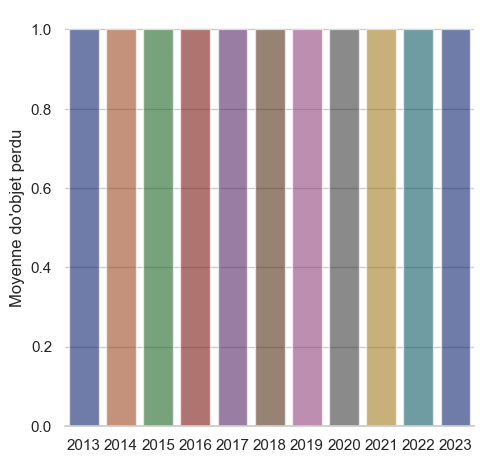

In [139]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_objet_perdu_groupby_year, kind="bar",
    x="Year", y="nb", palette="dark", alpha=.6, height=5
)
g.despine(left=True)
g.set_axis_labels("", "Moyenne do'objet perdu")

In [ ]:
df_objet_perdu_groupby_year

,id,date_heure_restitution,type,gare_origine,nature,nom_recordtype,Month,Day
Year,,,,,,,,
2013,637,239,637,637,637,637,637,637
2014,3910,1391,3910,3910,3910,3910,3910,3910
2015,4149,1358,4149,4149,4149,4149,4149,4149
2016,4131,1369,4131,4131,4131,4131,4131,4131
2017,4614,1358,4614,4614,4614,4614,4614,4614
2018,4364,1296,4364,4364,4364,4364,4364,4364
2019,3005,1166,3005,3005,3005,3005,3005,3005
2020,1526,585,1526,1526,1526,1526,1526,1526
2021,1915,854,1915,1915,1915,1915,1915,1915


In [ ]:
df_objet_perdu_groupby = df_objet_perdu.groupby(['date']).count().reset_index()

9.557650695517774

In [ ]:
df_objet_perdu = df_objet_perdu.set_index('date')

In [ ]:
df_objet_perdu["id"]

date
2013-12-31        1
2013-12-31        2
2013-12-31        3
2013-12-31        4
2013-12-31        5
              ...  
2023-01-02    30915
2023-01-01    30916
2023-01-01    30917
2023-01-01    30918
2023-01-01    30919
Name: id, Length: 30919, dtype: int64